In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

In [2]:
df = pd.read_csv('../vehicles_us.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [4]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

In [5]:
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


In [6]:
median_model_year = df.groupby('model')['model_year'].agg('median')

df['model_year'] = df['model_year'].fillna(df['model'].map(median_model_year))
median_cylinders = df.groupby('model')['cylinders'].median()
df['cylinders'] = df['cylinders'].fillna(df['model'].map(median_cylinders))
median_odometer = df.groupby('model_year')['odometer'].median()
df['odometer'] = df['odometer'].fillna(df['model_year'].map(median_odometer))
df['odometer'] = df['odometer'].fillna(df['odometer'].median())
df['is_4wd'] = df['is_4wd'].fillna(0)
df['paint_color'] = df['paint_color'].fillna('no info')

In [7]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [8]:
df.to_csv('../cleaned_vehicles_us.csv', index=False)

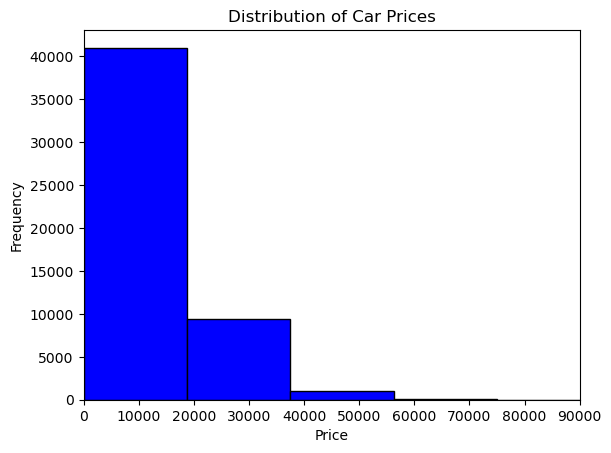

In [9]:
plt.hist(df['price'], bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.xlim(0, 90000)
plt.show()

In [10]:
display(df['price'].describe())

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

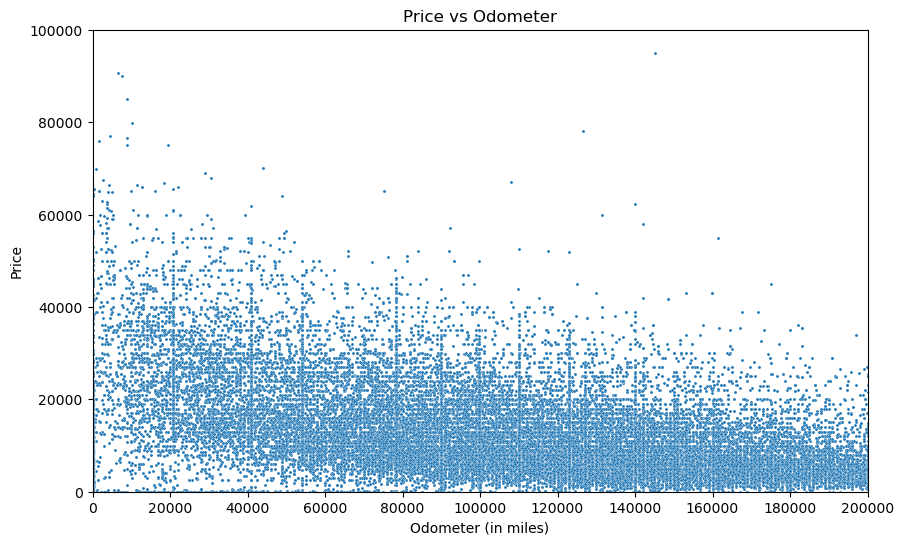

In [14]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['odometer'], y=df['price'], s=5)
plt.title('Price vs Odometer')
plt.xlabel('Odometer (in miles)')
plt.ylabel('Price')
plt.ylim(0,100000)
plt.xlim(0, 200000) 
plt.xticks(range(0, 200001, 20000)) 
plt.show()

C:\Users\PC\AppData\Local\Temp\ipykernel_11932\2753217750.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='model_year', y='price', data=avg_price_by_year, palette="viridis")


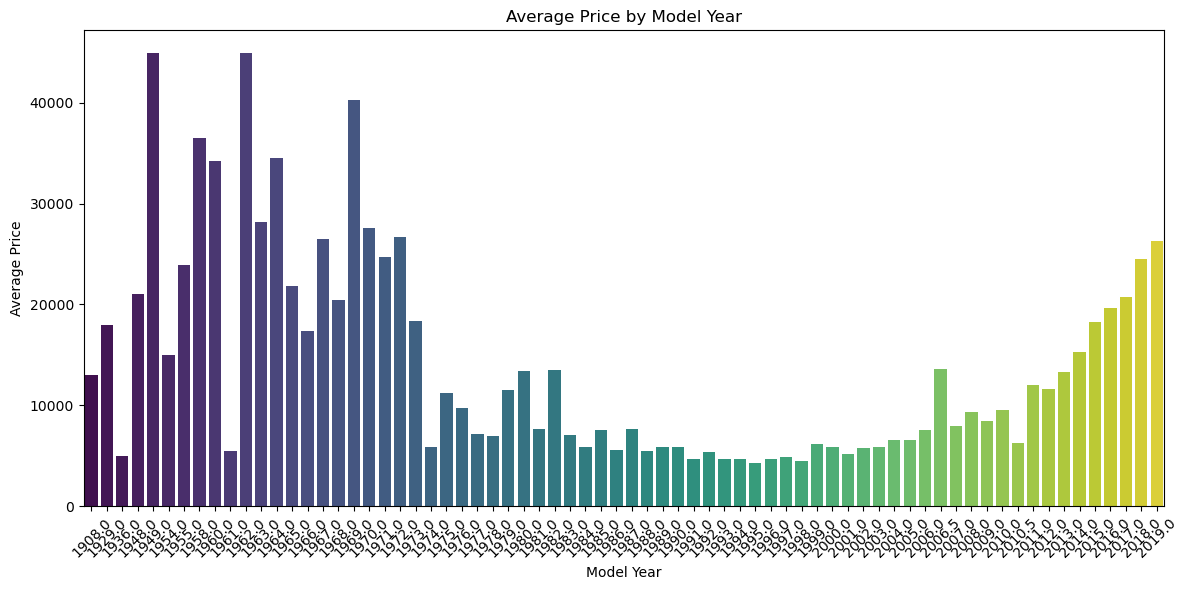

In [12]:
plt.figure(figsize=(12, 6))
avg_price_by_year = df.groupby('model_year')['price'].mean().reset_index()
sns.barplot(x='model_year', y='price', data=avg_price_by_year, palette="viridis")
plt.title('Average Price by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()